In [1]:
import pandas as pd #used for working with data set.has functions for analyzing, cleaning, exploring, and manipulating data.
import numpy as np #guarantee efficient calculations with arrays and matrices
import matplotlib.pyplot as plt #data visualization and graphical plotting library for Python
from datetime import datetime #classes for manipulating dates and times
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor 
    ##how much a feature's inclusion contributes to the overall variance of the coefficients

In [2]:
# Loading the Dataset and using pandas to load and handle the data
data = pd.read_csv("cabdata.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) #this helps in handling and manipulating the datetime data
data["START_DATE"] = data["START_DATE"].map(pd.to_datetime) #this helps in handling and manipulating the datetime data

data.head()

START_DATE        END_DATE           Date/Time CATEGORY*      Lat  \
0 2016-01-01 21:11:00  1/1/2016 21:17 2014-09-01 00:01:00  Business  40.2201   
1 2016-01-02 01:25:00   1/2/2016 1:37 2014-09-01 00:01:00  Business  40.7500   
2 2016-01-02 20:25:00  1/2/2016 20:38 2014-09-01 00:03:00  Business  40.7559   
3 2016-01-05 17:31:00  1/5/2016 17:45 2014-09-01 00:06:00  Business  40.7450   
4 2016-01-06 14:42:00  1/6/2016 15:49 2014-09-01 00:11:00  Business  40.8145   

       Lon    Base  
0 -74.0021  B02512  
1 -74.0027  B02512  
2 -73.9864  B02512  
3 -73.9889  B02512  
4 -73.9444  B02512

In [3]:
data.tail()

START_DATE          END_DATE           Date/Time CATEGORY*  \
51693 2016-10-29 17:13:00  10/29/2016 19:19 2014-09-03 18:47:00  Business   
51694 2016-10-30 07:49:00   10/30/2016 8:30 2014-09-03 18:47:00  Business   
51695 2016-10-30 09:07:00  10/30/2016 10:09 2014-09-03 18:47:00  Business   
51696 2016-10-30 10:11:00  10/30/2016 10:38 2014-09-03 18:47:00  Business   
51697 2016-10-30 10:51:00  10/30/2016 11:21 2014-09-03 18:47:00  Business   

           Lat      Lon    Base  
51693  40.7467 -73.9838  B02598  
51694  40.7423 -73.9871  B02598  
51695  40.7386 -73.9845  B02598  
51696  40.7075 -74.0042  B02598  
51697  40.6726 -73.9661  B02598

In [4]:
#extract month from start date
count = 0
month=[]
while count < len(data):
    month.append(data['START_DATE'][count].month)
    count = count+1
data['Month'] = month
data.head(10)

START_DATE         END_DATE           Date/Time CATEGORY*      Lat  \
0 2016-01-01 21:11:00   1/1/2016 21:17 2014-09-01 00:01:00  Business  40.2201   
1 2016-01-02 01:25:00    1/2/2016 1:37 2014-09-01 00:01:00  Business  40.7500   
2 2016-01-02 20:25:00   1/2/2016 20:38 2014-09-01 00:03:00  Business  40.7559   
3 2016-01-05 17:31:00   1/5/2016 17:45 2014-09-01 00:06:00  Business  40.7450   
4 2016-01-06 14:42:00   1/6/2016 15:49 2014-09-01 00:11:00  Business  40.8145   
5 2016-01-06 17:15:00   1/6/2016 17:19 2014-09-01 00:12:00  Business  40.6735   
6 2016-01-06 17:30:00   1/6/2016 17:35 2014-09-01 00:15:00  Business  40.7471   
7 2016-01-07 13:27:00   1/7/2016 13:33 2014-09-01 00:16:00  Business  40.6613   
8 2016-01-10 08:05:00   1/10/2016 8:25 2014-09-01 00:32:00  Business  40.3745   
9 2016-01-10 12:17:00  1/10/2016 12:44 2014-09-01 00:33:00  Business  40.7633   

       Lon    Base  Month  
0 -74.0021  B02512      1  
1 -74.0027  B02512      1  
2 -73.9864  B02512      1  
3 -73.9889  B02512      1  
4 -73.9444  B02512      1  
5 -73.9918  B02512      1  
6 -73.6472  B02512      1  
7 -74.2691  B02512      1  
8 -73.9999  B02512      1  
9 -73.9773  B02512      1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51698 entries, 0 to 51697
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  51698 non-null  datetime64[ns]
 1   END_DATE    51698 non-null  object        
 2   Date/Time   51698 non-null  datetime64[ns]
 3   CATEGORY*   51698 non-null  object        
 4   Lat         51698 non-null  float64       
 5   Lon         51698 non-null  float64       
 6   Base        51698 non-null  object        
 7   Month       51698 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 3.2+ MB


In [6]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

           START_DATE        END_DATE           Date/Time CATEGORY*      Lat  \
0 2016-01-01 21:11:00  1/1/2016 21:17 2014-09-01 00:01:00  Business  40.2201   
1 2016-01-02 01:25:00   1/2/2016 1:37 2014-09-01 00:01:00  Business  40.7500   
2 2016-01-02 20:25:00  1/2/2016 20:38 2014-09-01 00:03:00  Business  40.7559   
3 2016-01-05 17:31:00  1/5/2016 17:45 2014-09-01 00:06:00  Business  40.7450   
4 2016-01-06 14:42:00  1/6/2016 15:49 2014-09-01 00:11:00  Business  40.8145   

       Lon    Base  Month  Day  Weekday  Hour  
0 -74.0021  B02512      1    1        0     0  
1 -74.0027  B02512      1    1        0     0  
2 -73.9864  B02512      1    1        0     0  
3 -73.9889  B02512      1    1        0     0  
4 -73.9444  B02512      1    1        0     0  


<AxesSubplot:xlabel='Day', ylabel='Density'>

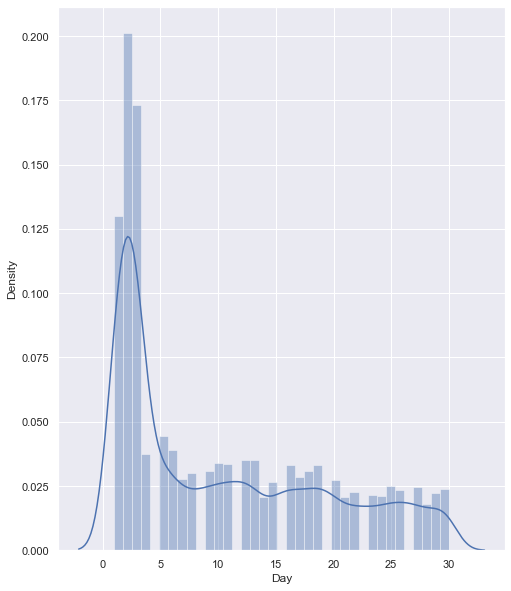

In [7]:
import seaborn as sns #to visualize random distributions
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(8, 10)})
sns.distplot(data["Day"])
#booking pattern is alsmot similar across the month

Text(0.5, 1.0, 'Number of trips per Month')

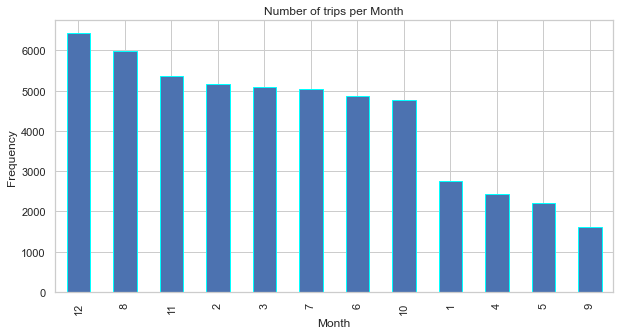

In [8]:
# plot number of trips at each month
x = data['Month'].value_counts()
sns.set_style('whitegrid')
x.plot(kind='bar',figsize=(10,5),edgecolor='cyan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

we can see most of the trips happen around the last quater of the year 

<AxesSubplot:xlabel='Hour', ylabel='Density'>

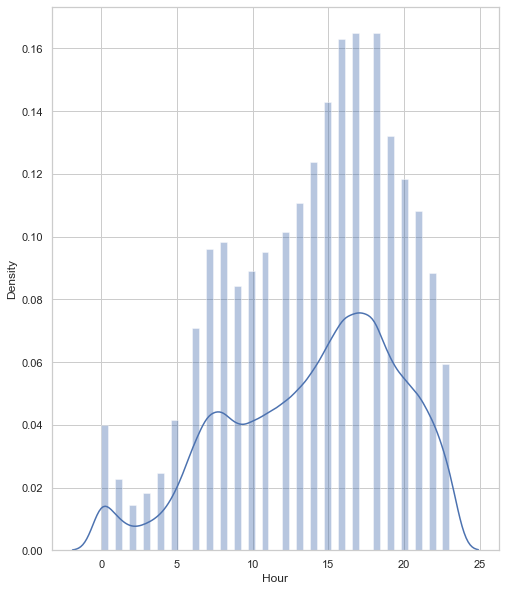

In [9]:
#checking the density of booking 
sns.set_style('whitegrid')
sns.distplot(data["Hour"])
#we see there a more no of booking in late evening

<AxesSubplot:xlabel='Weekday', ylabel='Density'>

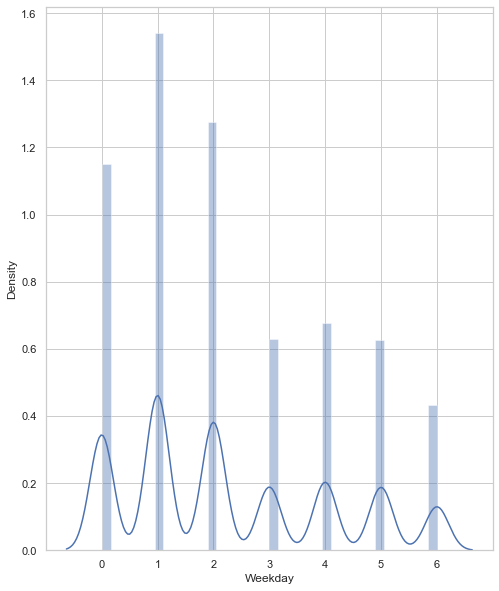

In [10]:
#checking the density of booking 
sns.set_style('whitegrid')
sns.distplot(data["Weekday"])
# we see there is demand on weekend as well

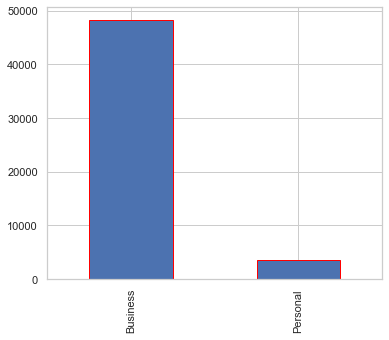

In [11]:
# plottinh total trips for each category present in the data 
x = data['CATEGORY*'].value_counts().plot(kind='bar',figsize=(6,5),edgecolor='Red')

we notice that the most trips made in business category with huge difference beteewn it and personal category.

<AxesSubplot:xlabel='Hour', ylabel='Hour'>

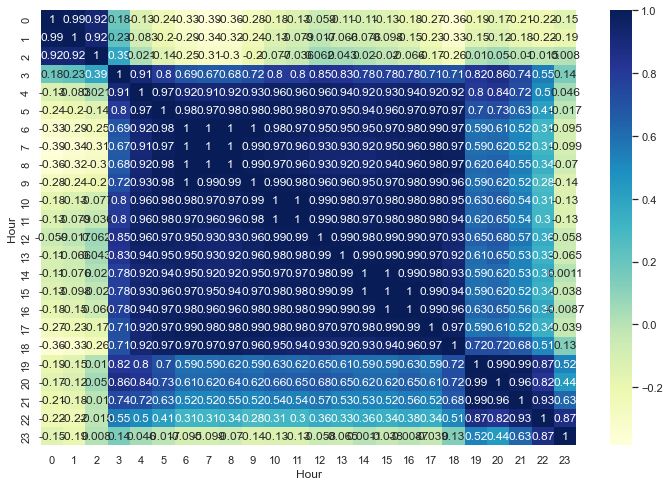

In [12]:
# plotting correlation between Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')
##sns.heatmap(df.corr(), annot=False)
##sns.scatterplot(x='HOUR', y='WEEKDAY',data=df, annot=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


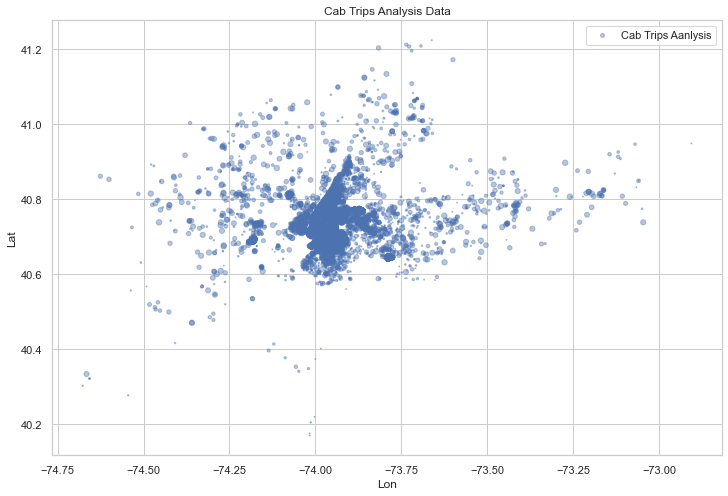

In [14]:
#Plotting Scatter Analysis to check the booking Density
sns.set_style('whitegrid')
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Cab Trips Aanlysis',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Cab Trips Analysis Data")
plt.legend()
plt.show()